In [1]:
import pandas as pd

# Analyse dataset

Fichier à uploader dans son google drive (source: https://www.kaggle.com/blastchar/telco-customer-churn)


## Build dataset

In [29]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
len(df)

7043

## Création dataset churn=yes, une ligne par mois par client

Lorenzo

In [5]:
import copy

data = df.to_dict(orient='records')
new_data = []

for row in data:
    tmp_row = copy.deepcopy(row)
    tmp_row["current_tenure"] = tmp_row["tenure"]
    new_data.append(tmp_row)
    for ten in range(1, row["tenure"]):
        tmp_row = copy.deepcopy(row)
        tmp_row["current_tenure"] = ten
        new_data.append(tmp_row)

df_all_tenures = pd.DataFrame.from_dict(new_data)

In [6]:
df_all_tenures[df_all_tenures["customerID"] == '9305-CDSKC']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,current_tenure
84,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,8
85,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1
86,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,2
87,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,3
88,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,4
89,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,5
90,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,6
91,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,7


In [7]:
len(df_all_tenures)

228001

In [8]:
df_all_tenures.to_csv('df_churn_all_tenures.csv', index=False)

# Analyse dataset

In [2]:
df = pd.read_csv("./df_churn_all_tenures.csv", low_memory=False)

In [3]:
df = df[df["Churn"] == "Yes"]

<AxesSubplot:>

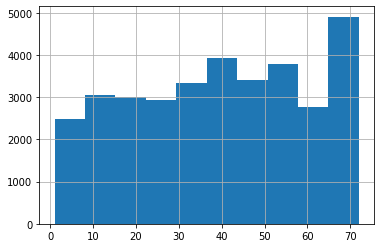

In [4]:
df[df['Churn'] == "Yes"]["tenure"].hist()

<AxesSubplot:>

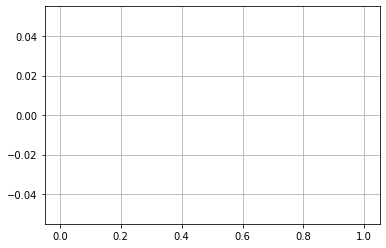

In [5]:
df[df['Churn'] == "No"]["tenure"].hist()

Pas mal de colonnes, la variable à prédire pour nous sera "tenure". On peut aussi retirer customerID

In [6]:
df.drop(["Churn"], axis=1, inplace=True)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
current_tenure        int64
dtype: object

Beaucoup de colonnes de type object que l'on transforme en dummies (soit Yes/No devient 1/0, soit Male/Female devient 1/0)

[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) plus performant

In [8]:
df['Partner'] = pd.get_dummies(df['Partner'])['Yes']
df['Dependents'] = pd.get_dummies(df['Dependents'])['Yes']
df['PhoneService'] = pd.get_dummies(df['PhoneService'])['Yes']
df['OnlineSecurity'] = pd.get_dummies(df['OnlineSecurity'])['Yes']
df['OnlineBackup'] = pd.get_dummies(df['OnlineBackup'])['Yes']
df['DeviceProtection'] = pd.get_dummies(df['DeviceProtection'])['Yes']
df['TechSupport'] = pd.get_dummies(df['TechSupport'])['Yes']
df['StreamingTV'] = pd.get_dummies(df['StreamingTV'])['Yes']
df['StreamingMovies'] = pd.get_dummies(df['StreamingMovies'])['Yes']
df['PaperlessBilling'] = pd.get_dummies(df['PaperlessBilling'])['Yes']
df['Male'] = pd.get_dummies(df['gender'])['Male']
df = df.drop(['gender'], axis=1)

In [9]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,current_tenure,Male
35,3668-QPYBK,0,0,0,2,1,No,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,2,1
36,3668-QPYBK,0,0,0,2,1,No,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
82,9237-HQITU,0,0,0,2,1,No,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,2,0
83,9237-HQITU,0,0,0,2,1,No,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0
84,9305-CDSKC,0,0,0,8,1,Yes,Fiber optic,0,0,...,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,8,0


On transforme les colonnes restantes en Categorical

In [10]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [11]:
# No = 0, DSL = 1, Fiber optic = 2
df['InternetService'] = df['InternetService'].astype('category')
df['InternetService'] = df['InternetService'].cat.reorder_categories(['No', 'DSL', 'Fiber optic'], ordered=True)
df['InternetService'] = df['InternetService'].cat.codes

In [12]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,current_tenure,Male
35,3668-QPYBK,0,0,0,2,1,No,1,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,2,1
36,3668-QPYBK,0,0,0,2,1,No,1,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
82,9237-HQITU,0,0,0,2,1,No,2,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,2,0
83,9237-HQITU,0,0,0,2,1,No,2,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0
84,9305-CDSKC,0,0,0,8,1,Yes,2,0,0,...,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,8,0


In [13]:
df['PaymentMethod'] = df['PaymentMethod'].astype('category')
payment_categories = dict(enumerate(df['PaymentMethod'].cat.categories))
df['PaymentMethod'] = df['PaymentMethod'].cat.codes

payment_categories, df['PaymentMethod']

({0: 'Bank transfer (automatic)',
  1: 'Credit card (automatic)',
  2: 'Electronic check',
  3: 'Mailed check'},
 35        3
 36        3
 82        2
 83        2
 84        2
          ..
 227720    1
 227931    3
 227932    3
 227933    3
 227934    3
 Name: PaymentMethod, Length: 33603, dtype: int8)

<AxesSubplot:>

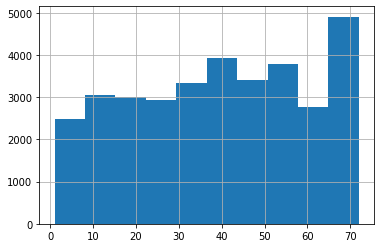

In [14]:
df['tenure'].hist()

Répartition des temps d'abonnements, assez équilibré entre 0 et 72 mois (6 ans => clients qui n'ont pas encore churn ? Que prédire pour eux ?)

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [16]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,current_tenure,Male
35,3668-QPYBK,0,0,0,2,1,No,1,1,1,...,0,0,0,Month-to-month,1,3,53.85,108.15,2,1
36,3668-QPYBK,0,0,0,2,1,No,1,1,1,...,0,0,0,Month-to-month,1,3,53.85,108.15,1,1
82,9237-HQITU,0,0,0,2,1,No,2,0,0,...,0,0,0,Month-to-month,1,2,70.70,151.65,2,0
83,9237-HQITU,0,0,0,2,1,No,2,0,0,...,0,0,0,Month-to-month,1,2,70.70,151.65,1,0
84,9305-CDSKC,0,0,0,8,1,Yes,2,0,0,...,0,1,1,Month-to-month,1,2,99.65,820.50,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227720,0639-TSIQW,0,0,0,67,1,Yes,2,1,1,...,0,1,0,Month-to-month,1,1,102.95,6886.25,66,0
227931,8361-LTMKD,1,1,0,4,1,Yes,2,0,0,...,0,0,0,Month-to-month,1,3,74.40,306.60,4,1
227932,8361-LTMKD,1,1,0,4,1,Yes,2,0,0,...,0,0,0,Month-to-month,1,3,74.40,306.60,1,1
227933,8361-LTMKD,1,1,0,4,1,Yes,2,0,0,...,0,0,0,Month-to-month,1,3,74.40,306.60,2,1


In [17]:
df = pd.get_dummies(df, columns=["MultipleLines", "Contract"])

Transformation en dummies pour le reste des colonnes

In [18]:
df = df[["customerID", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges", "Male", "MultipleLines_No", "MultipleLines_No phone service", "MultipleLines_Yes", "Contract_Month-to-month", "Contract_One year", "Contract_Two year", "current_tenure", "tenure"]]
df

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,current_tenure,tenure
35,3668-QPYBK,0,0,0,1,1,1,1,0,0,...,108.15,1,1,0,0,1,0,0,2,2
36,3668-QPYBK,0,0,0,1,1,1,1,0,0,...,108.15,1,1,0,0,1,0,0,1,2
82,9237-HQITU,0,0,0,1,2,0,0,0,0,...,151.65,0,1,0,0,1,0,0,2,2
83,9237-HQITU,0,0,0,1,2,0,0,0,0,...,151.65,0,1,0,0,1,0,0,1,2
84,9305-CDSKC,0,0,0,1,2,0,0,1,0,...,820.50,0,0,0,1,1,0,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227720,0639-TSIQW,0,0,0,1,2,1,1,1,0,...,6886.25,0,0,0,1,1,0,0,66,67
227931,8361-LTMKD,1,1,0,1,2,0,0,0,0,...,306.60,1,0,0,1,1,0,0,4,4
227932,8361-LTMKD,1,1,0,1,2,0,0,0,0,...,306.60,1,0,0,1,1,0,0,1,4
227933,8361-LTMKD,1,1,0,1,2,0,0,0,0,...,306.60,1,0,0,1,1,0,0,2,4


In [19]:
df.dtypes

customerID                         object
SeniorCitizen                       int64
Partner                             uint8
Dependents                          uint8
PhoneService                        uint8
InternetService                      int8
OnlineSecurity                      uint8
OnlineBackup                        uint8
DeviceProtection                    uint8
TechSupport                         uint8
StreamingTV                         uint8
StreamingMovies                     uint8
PaperlessBilling                    uint8
PaymentMethod                        int8
MonthlyCharges                    float64
TotalCharges                      float64
Male                                uint8
MultipleLines_No                    uint8
MultipleLines_No phone service      uint8
MultipleLines_Yes                   uint8
Contract_Month-to-month             uint8
Contract_One year                   uint8
Contract_Two year                   uint8
current_tenure                    

<AxesSubplot:>

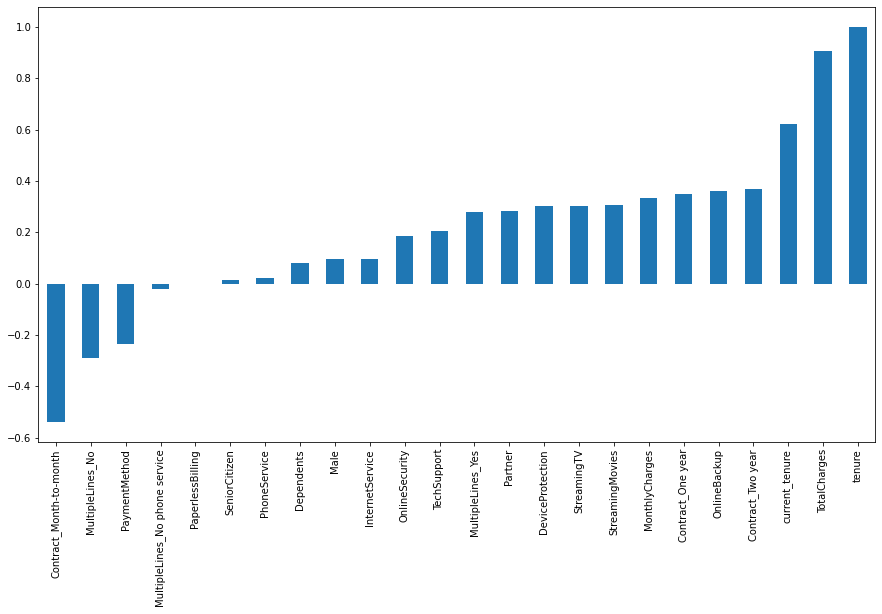

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
df.corr()['tenure'].sort_values().plot(kind='bar')

Corrélation entre tenure et les autres colonnes. Evidemment, TotalCharges et Contract_TwoYears sont très corrélés avec tenure. Intéressant que Partner soit aussi haut.

In [21]:
df.drop('TotalCharges', axis=1, inplace=True)

In [22]:
import random

def train_test_split_custom(df, test_size=0.2):
    """
    Makes a list of all the customerIDs, shuffle the list and build a
    dataframe with all data and with customer ID in the order of the new list.
    Split this new dataframe into train and test dataframes.
    Order them by customerID then tenure.

    Args:
        df: Input dataframe
        test_size: Part of the data for test set

    Returns:
        train_df: train set as DataFrame
        test_df: test set as DataFrame
    """
    customerIDs = df.customerID.unique()
    random.shuffle(customerIDs)
    new_df = pd.DataFrame(columns=df.columns)
    for customerID in customerIDs:
        new_df = new_df.append(df[df["customerID"] == customerID])
    new_df = new_df.infer_objects()
    test_size = int(len(new_df) * (1 - test_size))
    train_df = new_df.iloc[:test_size]
    test_df = new_df.iloc[test_size:]
    train_df = train_df.sort_values(by=["customerID", "current_tenure"]).set_index("customerID")
    test_df = test_df.sort_values(by=["customerID", "current_tenure"]).set_index("customerID")
    return train_df, test_df

train, test = train_test_split_custom(df)
X_train, X_test, y_train, y_test = train.drop(['tenure'], axis=1), test.drop(['tenure'], axis=1), train.tenure, test.tenure

# Classification

In [50]:
from sklearn.model_selection import train_test_split

y = df.tenure
X = df.drop(['tenure'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))

MAE: 13.446524064171124


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

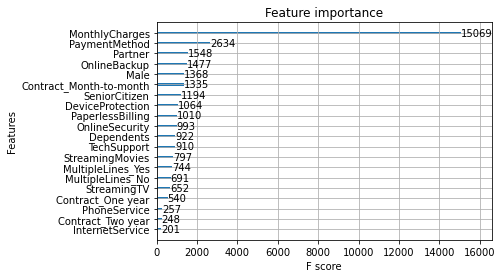

In [ ]:
from xgboost import plot_importance
plot_importance(model)

In [ ]:
y_pred = model.predict(X_test)
error = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f mois" % (error))

MAE: 11.05 mois


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X, y)
predictions = clf.predict(X_test)
error = mean_absolute_error(y_test, predictions)

print(f"MAE: {error:.2f} mois")

MAE: 0.06 mois


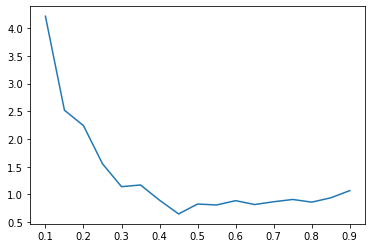

In [ ]:
import numpy as np

errors = []
for max_features in np.linspace(0.1, 0.9, 17):
    clf = RandomForestClassifier(max_depth=10, max_features=max_features, min_samples_leaf=2)
    clf.fit(X, y)
    predictions = clf.predict(X_test)
    error = mean_absolute_error(y_test, predictions)
    errors.append(error)

plt.plot(np.linspace(0.1, 0.9, 17), errors)

max_features=0.45-0.6 semble être une bonne valeur

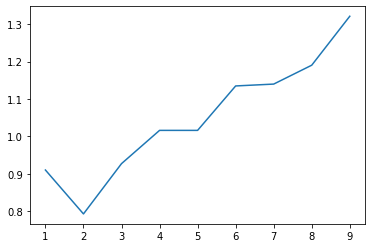

In [ ]:
errors = []
for min_samples_leaf in range(1, 10):
    clf = RandomForestClassifier(max_depth=10, max_features=0.55, min_samples_leaf=min_samples_leaf)
    clf.fit(X, y)
    predictions = clf.predict(X_test)
    error = mean_absolute_error(y_test, predictions)
    errors.append(error)

plt.plot(range(1, 10), errors)

min_samples_leaf=2 produit la plus petite erreur mais attention overfitting

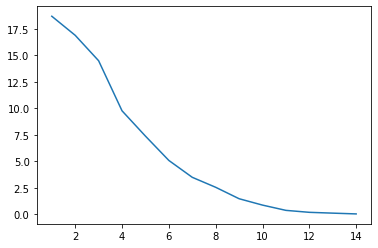

In [ ]:
errors = []
for max_depth in range(1, 15):
    clf = RandomForestClassifier(max_depth=max_depth, max_features=0.55, min_samples_leaf=2)
    clf.fit(X, y)
    predictions = clf.predict(X_test)
    error = mean_absolute_error(y_test, predictions)
    errors.append(error)

plt.plot(range(1, 15), errors)

\# TODO: k fold cross validation (sklearn)

#TODO: k fold cross validation

# Interprétabilité (interpretml)

https://interpret.ml/docs/ebm.html

In [ ]:
# from interpret import set_visualize_provider
# from interpret.provider import InlineProvider
# set_visualize_provider(InlineProvider())

In [31]:
train

,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,MonthlyCharges,Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,current_tenure,tenure
customerID,,,,,,,,,,,,,,,,,,,,,
0004-TLHLJ,0,0,0,1,2,0,0,1,0,0,...,73.9,1,1,0,0,1,0,0,1,4
0004-TLHLJ,0,0,0,1,2,0,0,1,0,0,...,73.9,1,1,0,0,1,0,0,2,4
0004-TLHLJ,0,0,0,1,2,0,0,1,0,0,...,73.9,1,1,0,0,1,0,0,3,4
0004-TLHLJ,0,0,0,1,2,0,0,1,0,0,...,73.9,1,1,0,0,1,0,0,4,4
0011-IGKFF,1,1,0,1,2,0,1,1,0,1,...,98.0,1,1,0,0,1,0,0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992-RRAMN,0,1,0,1,2,0,0,0,0,0,...,85.1,1,0,0,1,1,0,0,18,22
9992-RRAMN,0,1,0,1,2,0,0,0,0,0,...,85.1,1,0,0,1,1,0,0,19,22
9992-RRAMN,0,1,0,1,2,0,0,0,0,0,...,85.1,1,0,0,1,1,0,0,20,22


In [23]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show


ebm = ExplainableBoostingRegressor(random_state=1)
ebm.fit(X_train, y_train)

ebm_global = ebm.explain_global()
show(ebm_global)

ebm_local = ebm.explain_local(X_test[:20], y_test[:20])
show(ebm_local)

C:\Users\Maxime\AppData\Local\Programs\Python\Python39\lib\site-packages\interpret\visual\udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\Maxime\AppData\Local\Programs\Python\Python39\lib\site-packages\interpret\visual\udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Maxime\AppData\Local\Programs\Python\Python39\lib\site-packages\interpret\visual\udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


<!-- http://127.0.0.1:7001/2402010197776/ -->

<!-- http://127.0.0.1:7001/2401991209312/ -->

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = ebm.predict(X_test)
print("MAE:", mean_absolute_error(y_test, predictions))
print("RMSE:", mean_squared_error(y_test, predictions, squared=False))

MAE: 10.36461338812157
RMSE: 13.419394175007541
